<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/PVT/fluidcharacterization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Introduction to fluid characterization
#@markdown This section gives an introdution to fluid characterization of oil and gas.
%%capture
!pip install neqsim
import neqsim
from neqsim.thermo.thermoTools import *
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

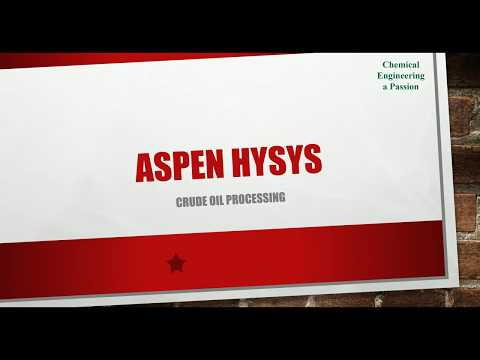

In [ ]:
#@title Introduction to fluid characterization in HYSYS
#@markdown This video gives an introduction introduction to fluid characterization in HYSYS
from IPython.display import YouTubeVideo
YouTubeVideo('D7xnyEDu1KU', width=600, height=400)

## Mathematical Methods for Well Fluid Characterization

### 1. **Equation of State (EOS) Models**:
These are mathematical models relating pressure, volume, and temperature (PVT) for a pure substance or mixture.

- **Van der Waals EOS**: One of the first equations developed to account for the non-ideal behavior of gases.
- **Peng-Robinson EOS** and **Soave-Redlich-Kwong EOS**: More advanced models, popular in the oil and gas industry due to their ability to handle hydrocarbons and their mixtures.

### 2. **Component Grouping**:
Given the vast number of components in a reservoir fluid, it's impractical to treat each individually. Grouping simplifies the number of components:

- **Plus Fraction Analysis**: Heavy components (C7+ and beyond) are lumped together and characterized by average properties like molecular weight and critical properties.
- **Pseudo-components**: The extensive hydrocarbon fraction is split into pseudo-components, each representing a range of molecular weights.

### 3. **Empirical Correlations**:
Over the years, many correlations have been developed based on experimental data to predict properties of reservoir fluids:

- **Standing-Katz Correlation**: For predicting the z-factor of natural gases.
- **Vazquez and Beggs Correlation**: Often used for oil viscosity estimation.

### 4. **Pedersen Method**:
A characterization technique that's especially useful for heavy and complex mixtures. It uses a combination of EOS models with empirical correlations.

### 5. **Whitson and Torp Method**:
For gas condensates and volatile oils. This method combines split characterization with an EOS model.

### 6. **Statistical Associating Fluid Theory (SAFT)**:
A molecular-based approach that offers a more rigorous description of the fluid's thermodynamic properties. It provides insights into molecular interactions and structures.

### 7. **Black-Oil Models**:
These are the simplest form of reservoir simulation models, treating the reservoir fluid as a combination of oil, water, and gas, neglecting the compositional details.

#Tuning the molar mass of a plus fraction to reservoir conductions
Phase Envelope (two-phase region): The region enclosed by the bubble-point curve and the dew point curve wherein gas and liquid coexist in equlibrium, is identified as the phase envelope of the hydrocarbon system. A gas reservoir is dominated by light components, and generally contain low amounts of C7+ components.

In the example below we tune the molar mass of the plus fraction to match reservoir pressure and temperature conditions.

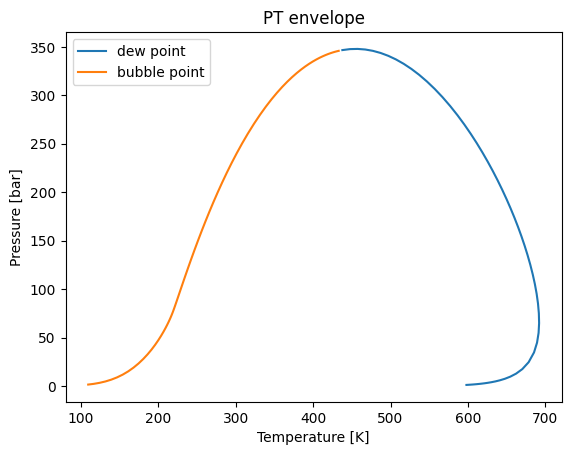

In [12]:
nitrogen = 0.51 #@param {type:"number"}
CO2 = 2.51 #@param {type:"number"}
methane = 20.0  #@param {type:"number"}
ethane = 4.01  #@param {type:"number"}
propane =  3.01 #@param {type:"number"}
ibutane =  1.25 #@param {type:"number"}
nbutane =  1.25 #@param {type:"number"}
ipentane =  0.25 #@param {type:"number"}
npentane = 0.25 #@param {type:"number"}
nhexane =  0.125 #@param {type:"number"}
C7 =  4.05 #@param {type:"number"}
C7Molarmass =  210.0 #@param {type:"number"}
C7Density =  810.2 #@param {type:"number"}

fluid1 = fluid('srk')
fluid1.addComponent("nitrogen", nitrogen)
fluid1.addComponent("CO2", CO2)
fluid1.addComponent("methane", methane)
fluid1.addComponent("ethane", ethane)
fluid1.addComponent("propane", propane)
fluid1.addComponent("i-butane", ibutane)
fluid1.addComponent("n-butane", nbutane)
fluid1.addComponent("i-pentane", ipentane)
fluid1.addComponent("n-pentane", npentane)
fluid1.addComponent("n-hexane", nhexane)
fluid1.addPlusFraction("C7", C7, C7Molarmass/1000.0, C7Density/1000.0)
fluid1.getCharacterization().characterisePlusFraction()
fluid1.setMixingRule('classic')

thermoOps = jNeqSim.thermodynamicOperations.ThermodynamicOperations(fluid1)
thermoOps.calcPTphaseEnvelope2()

plt.plot(list(thermoOps.getOperation().get("dewT")),list(thermoOps.getOperation().get("dewP")), label="dew point")
plt.plot(list(thermoOps.getOperation().get("bubT")),list(thermoOps.getOperation().get("bubP")), label="bubble point")
plt.title('PT envelope')
plt.xlabel('Temperature [K]')
plt.ylabel('Pressure [bar]')
plt.legend()
plt.show()

In [13]:
fluid1.setTemperature(630.0, "K")
fluid1.setPressure(200.0), "bara"
saturationTemperature = dewt(fluid1)
print('saturation temperature ', saturationTemperature, ' K')

saturation temperature  645.7983831641269  K


# How to Specify Fluid Characterization models
In this example we give examples how you can modify fluid characterization methods like PVT lumping, models for calculation properties of oil components and how to specify distribution models.

| 0                    | 1          | 2           | 3           | 4   | 5   | 6               |
|:---------------------|:-----------|:------------|:------------|:----|:----|:----------------|
|                      | total      | GAS         | OIL         |     |     |                 |
| nitrogen             | 1.12108E-2 | 1.39005E-2  | 6.11906E-4  |     |     | [mole fraction] |
| CO2                  | 1.12108E-2 | 1.3307E-2   | 2.9505E-3   |     |     | [mole fraction] |
| methane              | 7.287E-1   | 8.88505E-1  | 9.89815E-2  |     |     | [mole fraction] |
| ethane               | 3.36323E-2 | 3.83463E-2  | 1.50566E-2  |     |     | [mole fraction] |
| propane              | 2.24215E-2 | 2.25424E-2  | 2.19451E-2  |     |     | [mole fraction] |
| i-butane             | 1.12108E-2 | 9.57907E-3  | 1.76405E-2  |     |     | [mole fraction] |
| n-butane             | 1.12108E-2 | 8.72486E-3  | 2.10066E-2  |     |     | [mole fraction] |
| i-pentane            | 1.12108E-3 | 6.

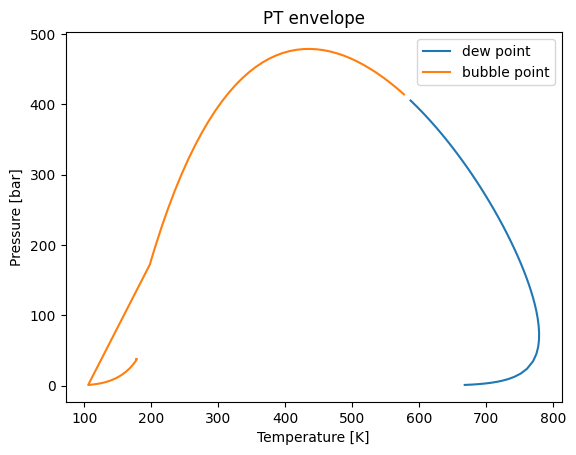

In [52]:
from neqsim.thermo.thermoTools import TPflash, printFrame

fluid1 = fluid('srk')
fluid1.addComponent("nitrogen", 1.0)
fluid1.addComponent("CO2", 1.0)
fluid1.addComponent("methane", 65.0)
fluid1.addComponent("ethane", 3.0)
fluid1.addComponent("propane", 2.0)
fluid1.addComponent("i-butane", 1.0)
fluid1.addComponent("n-butane", 1.0)
fluid1.addComponent("i-pentane", 0.1)
fluid1.addComponent("n-pentane", 0.1)
fluid1.addTBPfraction("C6", 1.0, 90.0 / 1000.0, 0.7);
fluid1.addTBPfraction("C7", 1.0, 110.0 / 1000.0, 0.73);
fluid1.addTBPfraction("C8", 1.0, 120.0 / 1000.0, 0.76);
fluid1.addTBPfraction("C9", 1.0, 140.0 / 1000.0, 0.79);
fluid1.addPlusFraction("C10", 11.0, 290.0 / 1000.0, 0.82);

fluid1.getCharacterization().setPlusFractionModel("Pedersen");
#thermoSystem.getCharacterization().setPlusFractionModel("Whitson Gamma Model");

fluid1.getCharacterization().setLumpingModel("PVTlumpingModel");

fluid1.getCharacterization().getLumpingModel().setNumberOfPseudoComponents(12)

fluid1.getCharacterization().characterisePlusFraction()

fluid1.setMixingRule('classic')

fluid1.setTemperature(80.0, 'C')
fluid1.setPressure(30.0, 'bara')

TPflash(fluid1)
printFrame(fluid1)

thermoOps = jNeqSim.thermodynamicOperations.ThermodynamicOperations(fluid1)
thermoOps.calcPTphaseEnvelope2()

plt.plot(list(thermoOps.getOperation().get("dewT")),list(thermoOps.getOperation().get("dewP")), label="dew point")
plt.plot(list(thermoOps.getOperation().get("bubT")),list(thermoOps.getOperation().get("bubP")), label="bubble point")
plt.title('PT envelope')
plt.xlabel('Temperature [K]')
plt.ylabel('Pressure [bar]')
plt.legend()
plt.show()